In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## library

In [2]:
import pandas as pd
import numpy as np


## dataframe

In [15]:
dataset=pd.read_excel('/content/drive/MyDrive/xlsx/pmodel/dataset.xlsx')
dataset

,word,label
0,salah satu metode efektif yang telah banyak di...,1
1,filter kalman digunakan untuk estimasi sudut k...,1
2,metode nyquist digunakan untuk menentukan kest...,1
3,banyaknya sensor untuk merekam ecg menyebabkan...,1
4,alat bantu yang digunakan untuk menganalisis a...,1
...,...,...
1995,saya orang nya berubah ubah kadang jadi ibu pe...,0
1996,gapernah diambil pusing apapun yang terjadi ak...,0
1997,siapa yang gagal move on nya berkelanjutan say...,0
1998,niat healing tapi jadi tambah galau tu gimana ...,0


## Exploratory Data Analysis (EDA)

In [ ]:
dataset.isna().sum()

kalimat    0
label      0
dtype: int64

In [ ]:
dataset.shape

(2000, 2)

<Axes: >

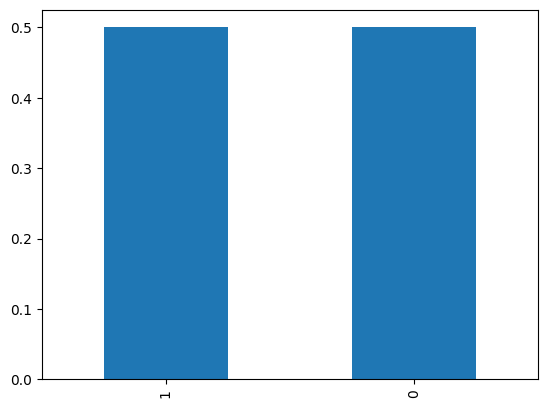

In [ ]:
# check target balance
dataset['label'].value_counts(normalize = True).plot.bar()

## Teks Preprocessing

In [16]:
f = open("/content/drive/MyDrive/xlsx/capstone/tala-stopwords-indonesia.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

In [17]:
# text preprocessing
# download nltk
import nltk
nltk.download('all')
# create a list text
text = list(dataset['word'])
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)
#assign corpus to data['text']
dataset['kalimat'] = corpus
dataset.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

,word,label,kalimat
0,salah satu metode efektif yang telah banyak di...,1,salah satu metode efektif yang telah banyak di...
1,filter kalman digunakan untuk estimasi sudut k...,1,filter kalman digunakan untuk estimasi sudut k...
2,metode nyquist digunakan untuk menentukan kest...,1,metode nyquist digunakan untuk menentukan kest...
3,banyaknya sensor untuk merekam ecg menyebabkan...,1,banyaknya sensor untuk merekam ecg menyebabkan...
4,alat bantu yang digunakan untuk menganalisis a...,1,alat bantu yang digunakan untuk menganalisis a...


## split

In [18]:
# Create Feature and Label sets
X = dataset['kalimat']
y = dataset['label']
# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (1340,)
Testing Data :  (660,)


## feature extraction

In [19]:
# Train Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(1340, 5118)

## model training dan evaluasi

In [20]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
# transform X_test using CV
X_test_cv = cv.transform(X_test)
# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

##akurasi

In [21]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9939393939393939


## comfusion matrix

In [22]:
# confusion matrix
import pandas as pd
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['1','0'], columns=['1','0'])
df

,1,0
1,329,1
0,3,327


## save model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

# Training Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# Simpan model ke dalam file
filename = 'logistic_regression_model.pkl'
joblib.dump(lr, filename)

# Output pesan untuk menandakan bahwa model telah disimpan
print("Model has been saved as", filename)


Model has been saved as logistic_regression_model.pkl


In [28]:
import joblib

# Memuat model dari file
loaded_model = joblib.load('logistic_regression_model.pkl')

# Contoh teks yang ingin Anda prediksi
teks_baru = input("")
xxx = [teks_baru]

# Melakukan vektorisasi pada teks baru (ganti dengan proses vektorisasi yang Anda gunakan)
teks_baru_cv = cv.transform(xxx)  # Ganti 'cv' dengan vektorisasi yang digunakan saat training

# Membuat prediksi menggunakan model yang sudah dimuat
predictions = loaded_model.predict(teks_baru_cv)
print(predictions)



aku sayang kamu
[0]
